# CONTEXT AND RELEVANCE

### Which describes these concerns:
- Where is the data sourced from?
- How it is collected?
- Are there any potential biases in the data?
- If there are biases, what are the risks and implications?


In [287]:
# import library
import pandas as pd

# Relative path to read the CSV file from the "GooglePlayStoreApps" folder
df = pd.read_csv(r"./raw-data/museum_inventory.csv")

# Convert columns to their appropriate data types
df = df.infer_objects()

---

# DATA QUALITY

### Check for missing values

In [288]:
# Check for missing values
null_counts = df.isnull().sum()

print(f"{null_counts}\n-----------\n")

for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count} null values")

accession_id              0
amo_number                0
description               0
quantity                  0
category                  0
current_market_value    115
asset_location            0
room_number               0
box_number              137
mode_of_acquisition       0
acquisition_date         96
acquisition_price        89
remarks                 134
dimensions              107
status                    0
date_created              0
date_modified             0
dtype: int64
-----------

current_market_value: 115 null values
box_number: 137 null values
acquisition_date: 96 null values
acquisition_price: 89 null values
remarks: 134 null values
dimensions: 107 null values


### Check for duplicates

In [289]:
print("There are", f"\033[1m{df.duplicated().sum()}\033[0m", "duplicates found")

There are 0 duplicates found


---

# DATA STRUCTURE AND TYPES

In [290]:
rows, columns = df.shape
print(f"Number of rows: {rows:,}")
print(f"Number of columns: {columns:,}")

Number of rows: 1,000
Number of columns: 17


In [291]:
# Print the data types of the columns
print(df.dtypes)

accession_id             object
amo_number               object
description              object
quantity                  int64
category                 object
current_market_value    float64
asset_location           object
room_number              object
box_number              float64
mode_of_acquisition      object
acquisition_date         object
acquisition_price       float64
remarks                  object
dimensions               object
status                   object
date_created             object
date_modified            object
dtype: object


In [292]:
print("Count of columns in each type:\n")
df.dtypes.value_counts()

Count of columns in each type:



object     13
float64     3
int64       1
Name: count, dtype: int64

---

# OUTLIERS

In [293]:
def find_extremes(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    return min_value, max_value

In [294]:
min_val, max_val = find_extremes(df, 'current_market_value')
print(f"Minimum: {min_val}, Maximum: {max_val}")

Minimum: -68033.76208736519, Maximum: 101318.28726636805


In [295]:
# The 5 smallest values
smallest_values = df['current_market_value'].nsmallest(5)
print("Smallest values:\n", smallest_values)

# The 5 largest values
largest_values = df['current_market_value'].nlargest(5)
print("Largest values:\n", largest_values)

Smallest values:
 887   -68033.762087
619   -67406.384455
597   -66213.565516
361   -62422.166074
373   -61274.245210
Name: current_market_value, dtype: float64
Largest values:
 115    101318.287266
998    100996.680111
999    100429.915706
266     81972.020211
997     77875.651979
Name: current_market_value, dtype: float64


---

# DATA DISTRIBUTIONS AND SUMMARY STATISTICS

In [296]:
import pandas as pd

def calculate_statistics(df, column):
    """
    Returns the mean, median, and mode for a specified column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate statistics for.

    Returns:
        dict: A dictionary containing the mean, median, and mode of the column.
    """
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None

    return {
        'mean': mean_value,
        'median': median_value,
        'mode': mode_value
    }

In [297]:
stats = calculate_statistics(df, 'current_market_value')

# Formatting the output
formatted_stats = (
    f"Statistics for 'current_market_value' column:\n"
    f"Mean: {stats['mean']}\n"
    f"Median: {stats['median']}\n"
    f"Mode: {stats['mode']}"
)

print(formatted_stats)

Statistics for 'current_market_value' column:
Mean: 5988.289361796009
Median: 6014.792280097059
Mode: -68033.76208736519


#### In simpler terms:

1. **Average Value**: The average current_market_value is about 5988.28
2. **Middle Value**: The middle current_market_value (when all current_market_value are sorted) is 6014.79.
3. **Most Common Value**: The most frequently occurring current_market_value is -68033.76.

#### Interpretation:
- **Mostly Balanced**: The current_market_value are mostly balanced around the middle value (5988.28).
- **Slightly Higher current_market_value**: There are a few higher current_market_value that make the average slightly lower than the most common current_market_value.
- **Consistent Data**: Most current_market_value are close to each other, with a slight tendency towards higher current_market_value.

#### Takeaway:
- The current_market_value are generally good, with most being around 5988.28 to 6014.79.
- There are some higher current_market_value, but they don't drastically affect the overall balance.
- You can trust the average and middle values to represent the typical current_market_value, with a slight lean towards higher current_market_value.

### Below is a histogram to put these interpretations into perspective

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_seaborn(df, column, bins=10):
    """
    Creates a histogram for a specified column using seaborn.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to create a histogram for.
        bins (int): The number of bins in the histogram (default is 10).
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


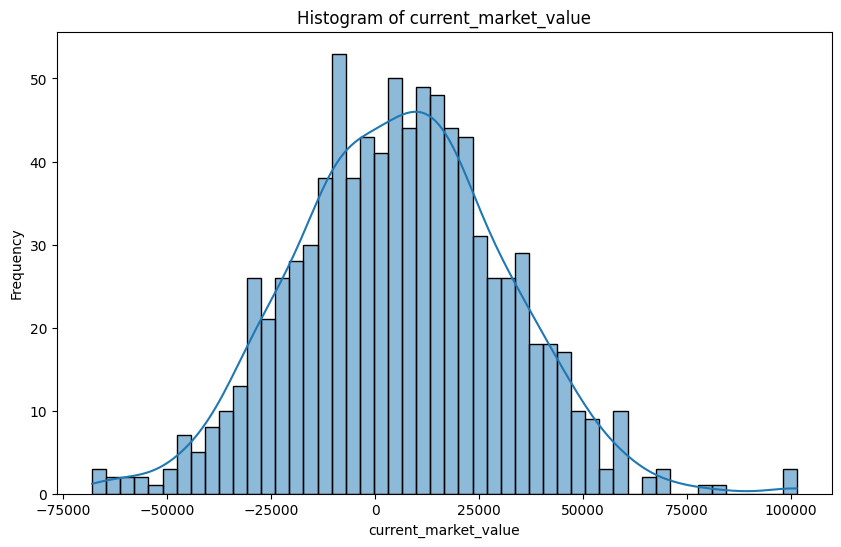

In [299]:
# With Outliers
plot_histogram_seaborn(df, 'current_market_value', bins=50)

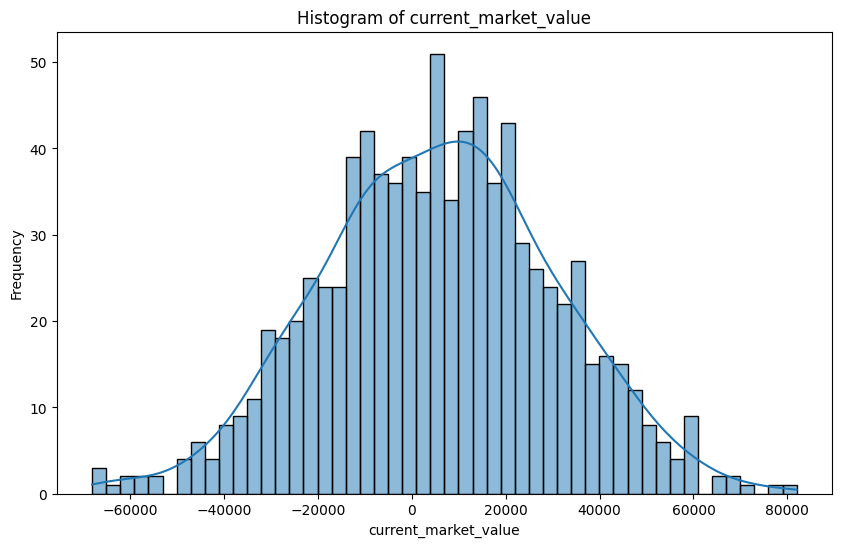

In [300]:
# Outliers Removed
plot_histogram_seaborn(df[df.current_market_value < 99999], 'current_market_value', bins=50)